In [162]:
# Create home and away free throws
# Show histagrams and maybe boxplots
# Group by teams
# Make hex plot with all teams, home on vertical, away on horizontal for FTA, FTM, and PCT


# Do The Fans Make Free Throws More Difficult?
You see it at every NBA game. When a player on the road team is shooting free throws, the fans behind the basket wave thundersticks to try to distract the shooter. But does it work? 

We are going to look at how teams shoot free throws at home and on the road as well as how the road teams fare in each of the NBA arenas.

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import seaborn as sns
from nba_api.stats.static import players, teams
from nba_api.stats.endpoints import leaguegamelog

# Get the data from NBA.com

We will be looking at data from all of the games in the 2018-19 NBA season.

In [164]:
 df = leaguegamelog.LeagueGameLog(season = '2018').get_data_frames()[0]

In [165]:
df.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22018,1610612744,GSW,Golden State Warriors,0021800002,2018-10-16,GSW vs. OKC,W,240,42,...,41,58,28,7,7,21,29,108,8,1
1,22018,1610612760,OKC,Oklahoma City Thunder,0021800002,2018-10-16,OKC @ GSW,L,240,33,...,29,45,21,12,6,15,21,100,-8,1
2,22018,1610612755,PHI,Philadelphia 76ers,0021800001,2018-10-16,PHI @ BOS,L,240,34,...,41,47,18,8,5,16,20,87,-18,1
3,22018,1610612738,BOS,Boston Celtics,0021800001,2018-10-16,BOS vs. PHI,W,240,42,...,43,55,21,7,5,15,20,105,18,1
4,22018,1610612750,MIN,Minnesota Timberwolves,0021800010,2018-10-17,MIN @ SAS,L,240,39,...,32,46,20,9,2,11,27,108,-4,1


In [166]:
df.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

# Create dataframe to hold free throw data

In [167]:
FTdf = df[['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'FTM', 'FTA', 'FT_PCT']]
FTdf.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,FTM,FTA,FT_PCT
0,22018,1610612744,GSW,Golden State Warriors,0021800002,2018-10-16,GSW vs. OKC,W,17,18,0.944
1,22018,1610612760,OKC,Oklahoma City Thunder,0021800002,2018-10-16,OKC @ GSW,L,24,37,0.649
2,22018,1610612755,PHI,Philadelphia 76ers,0021800001,2018-10-16,PHI @ BOS,L,14,23,0.609
3,22018,1610612738,BOS,Boston Celtics,0021800001,2018-10-16,BOS vs. PHI,W,10,14,0.714
4,22018,1610612750,MIN,Minnesota Timberwolves,0021800010,2018-10-17,MIN @ SAS,L,24,27,0.889


In [168]:
FTdf.describe()

,TEAM_ID,FTM,FTA,FT_PCT
count,2.460000e+03,2460.000000,2460.000000,2460.000000
mean,1.610613e+09,17.680488,23.072358,0.767115
std,8.657201e+00,6.087503,7.466480,0.102344
min,1.610613e+09,2.000000,4.000000,0.263000
25%,1.610613e+09,13.000000,18.000000,0.700000
50%,1.610613e+09,17.000000,23.000000,0.771000
75%,1.610613e+09,22.000000,28.000000,0.840000
max,1.610613e+09,44.000000,54.000000,1.000000


The data covers 1230 games, with each game having two records, one for each team. Teams made between 2 and 44 free throws on between 4 and 54 attempts. They made at least 26% of their free throws in each game. 

# Visualize the data

First we will look at the histograms of all free throws attempted and made as well as the free throw percentage for each game.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B96FF06488>,
      dtype=object)

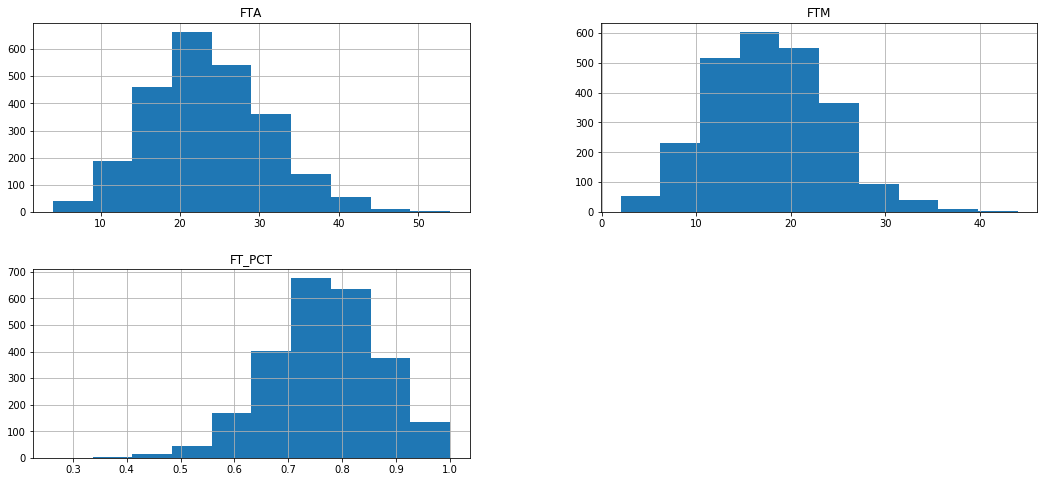

In [169]:
FTdf.hist(column = ['FTM','FTA','FT_PCT'], figsize=(18,8))

The free thows attempted, free throws made, and free throw percentage all look relatively normal.

Next, we look at the boxplots. Free throws attempted and made can be shown on the same plot, but the free throw percentage will be looked at on a separate plot.

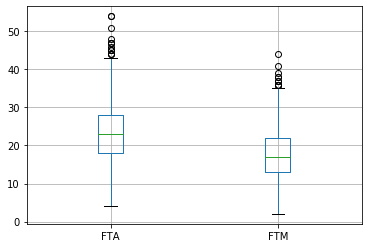

In [170]:
FTdf.boxplot(column = ['FTA','FTM'])

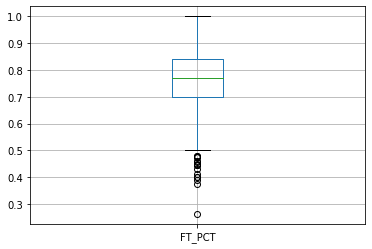

In [171]:
FTdf.boxplot(column = 'FT_PCT')

Here are the histograms for the free throw percentage for each team.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9703BBAC8>,
      dtype=object)

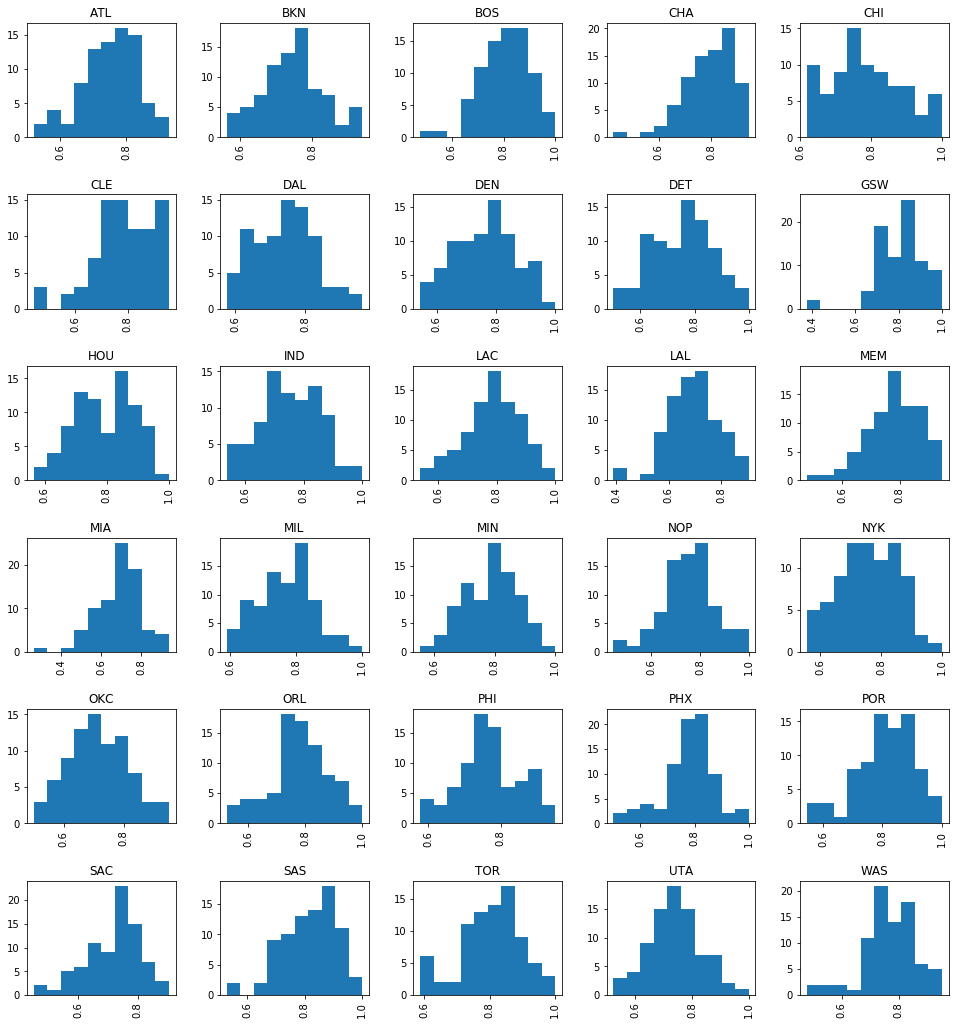

In [172]:
# https://stackoverflow.com/questions/19584029/plotting-histograms-from-grouped-data-in-a-pandas-dataframe
FTdf['FT_PCT'].hist(by=FTdf['TEAM_ABBREVIATION'], figsize = (16,18))

Most of the histograms look like they have relatively normal distributions.

# Home vs Away
It is time to look at the home/away splits. We create a new column called Home and give it a boolean value based on the Matchup column. The Matchup column for the first game is GSW vs. OKC for GSW and GSW @ OKC for OKC. Therefore, if the fifth element is 'v', then the record is about the home team. 

In [173]:
FTdf['Home'] = FTdf['MATCHUP'].str.strip().str[4] == 'v'
FTdf.head()

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,FTM,FTA,FT_PCT,Home
0,22018,1610612744,GSW,Golden State Warriors,0021800002,2018-10-16,GSW vs. OKC,W,17,18,0.944,True
1,22018,1610612760,OKC,Oklahoma City Thunder,0021800002,2018-10-16,OKC @ GSW,L,24,37,0.649,False
2,22018,1610612755,PHI,Philadelphia 76ers,0021800001,2018-10-16,PHI @ BOS,L,14,23,0.609,False
3,22018,1610612738,BOS,Boston Celtics,0021800001,2018-10-16,BOS vs. PHI,W,10,14,0.714,True
4,22018,1610612750,MIN,Minnesota Timberwolves,0021800010,2018-10-17,MIN @ SAS,L,24,27,0.889,False


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9726FCF48>,
      dtype=object)

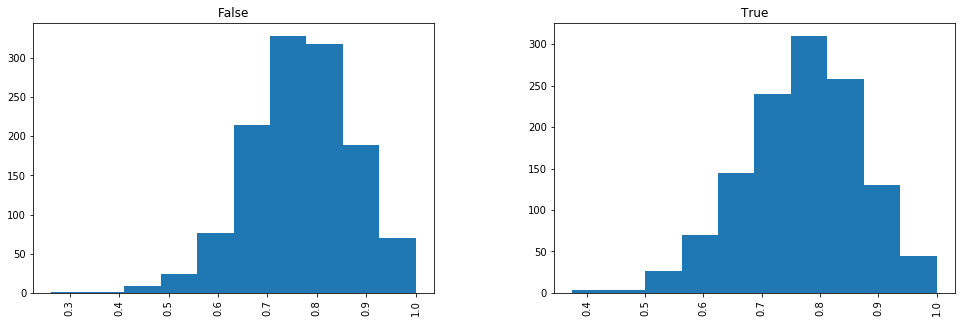

In [174]:
FTdf['FT_PCT'].hist(by=FTdf['Home'], figsize = (16,5))

These histograms do look pretty similar, which makes it look like the fans do not make much of a difference. Let's break it down and look at each team and each venue to see if we can find places where the fans may make more of a difference.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B972DE2788>,
      dtype=object)

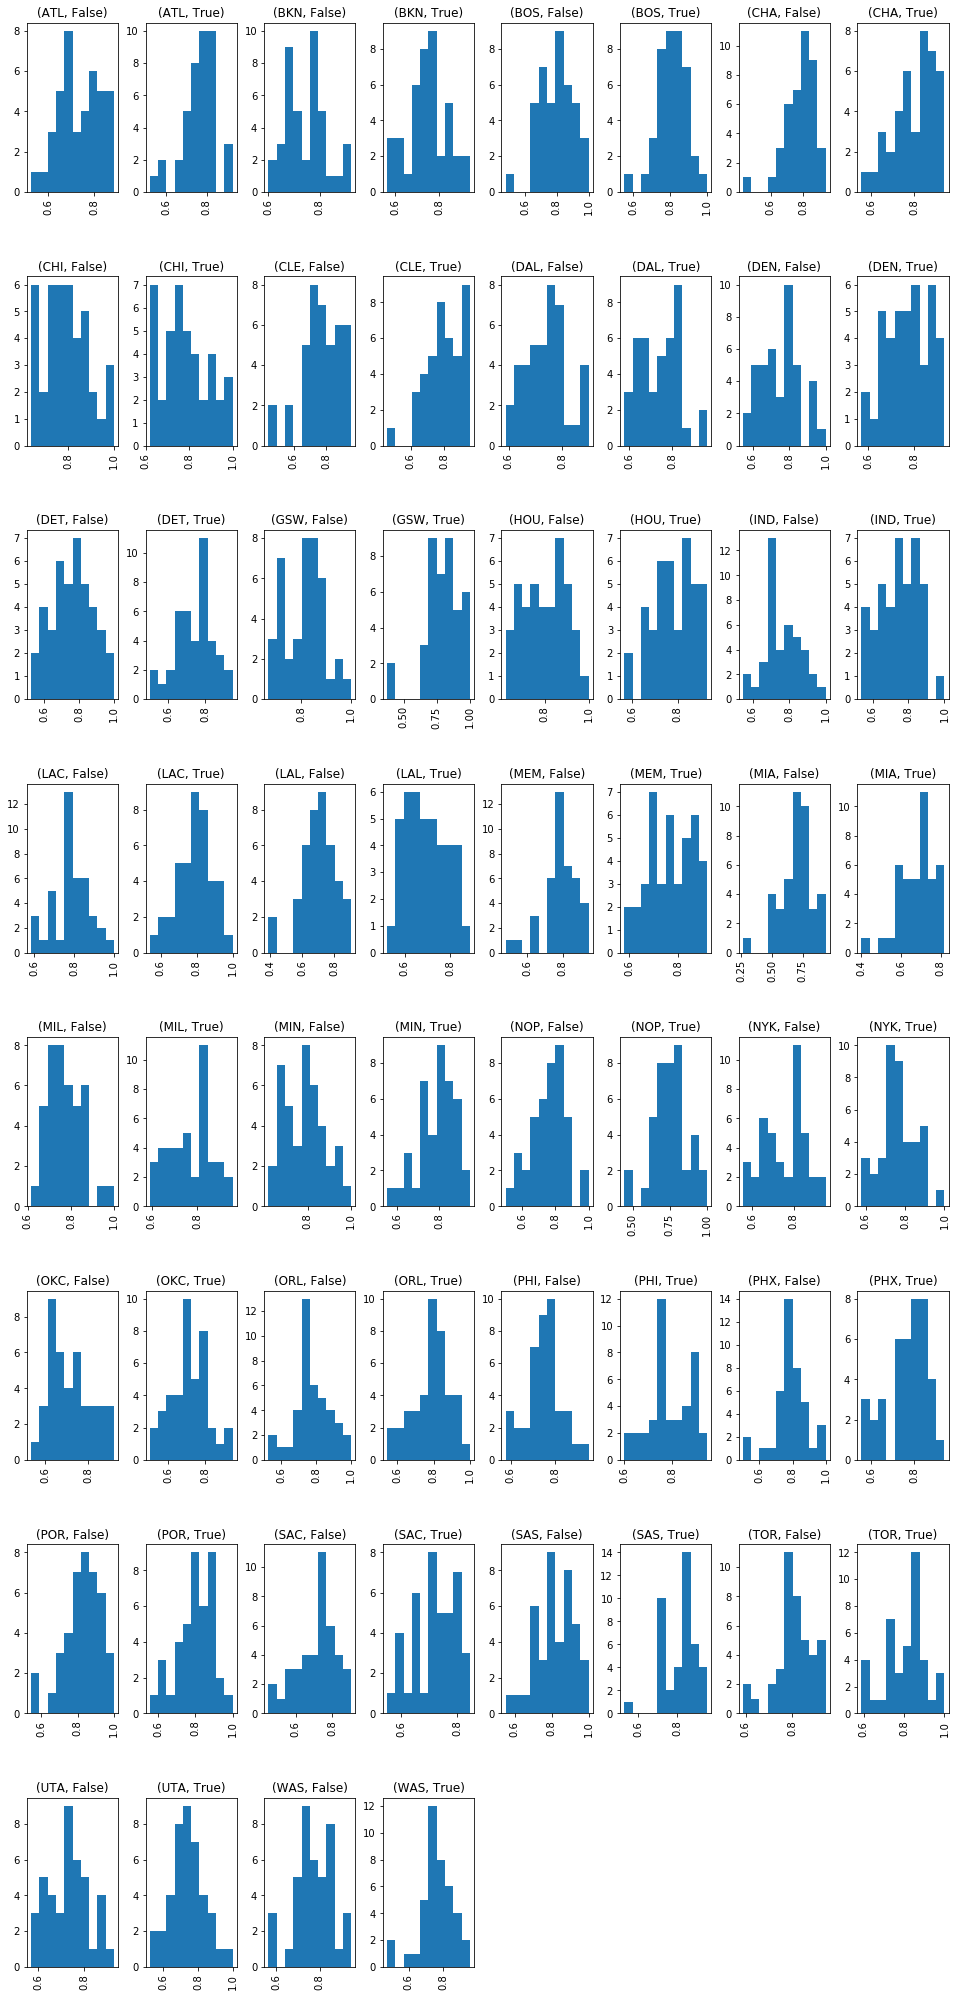

In [175]:
FTdf['FT_PCT'].hist(by=[FTdf['TEAM_ABBREVIATION'],FTdf['Home']], figsize = (16,36))

It does appear that some teams do worse on the road than they do at home. Let's see if there is a trend that we can identify.

In [176]:
# Create scatterplot of pct home and away for each team

## Add Venue Column

In [177]:
# Create column for venue and populate it, then look at histograms for each venue
FTdf['Venue'] = np.where(FTdf.Home, FTdf.TEAM_ABBREVIATION, FTdf.MATCHUP.str.strip().str[-3:])

C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [178]:
FTdf['Venue']

0       GSW
1       GSW
2       BOS
3       BOS
4       SAS
       ... 
2455    DEN
2456    CHA
2457    CHA
2458    MEM
2459    MEM
Name: Venue, Length: 2460, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9765B8248>,
      dtype=object)

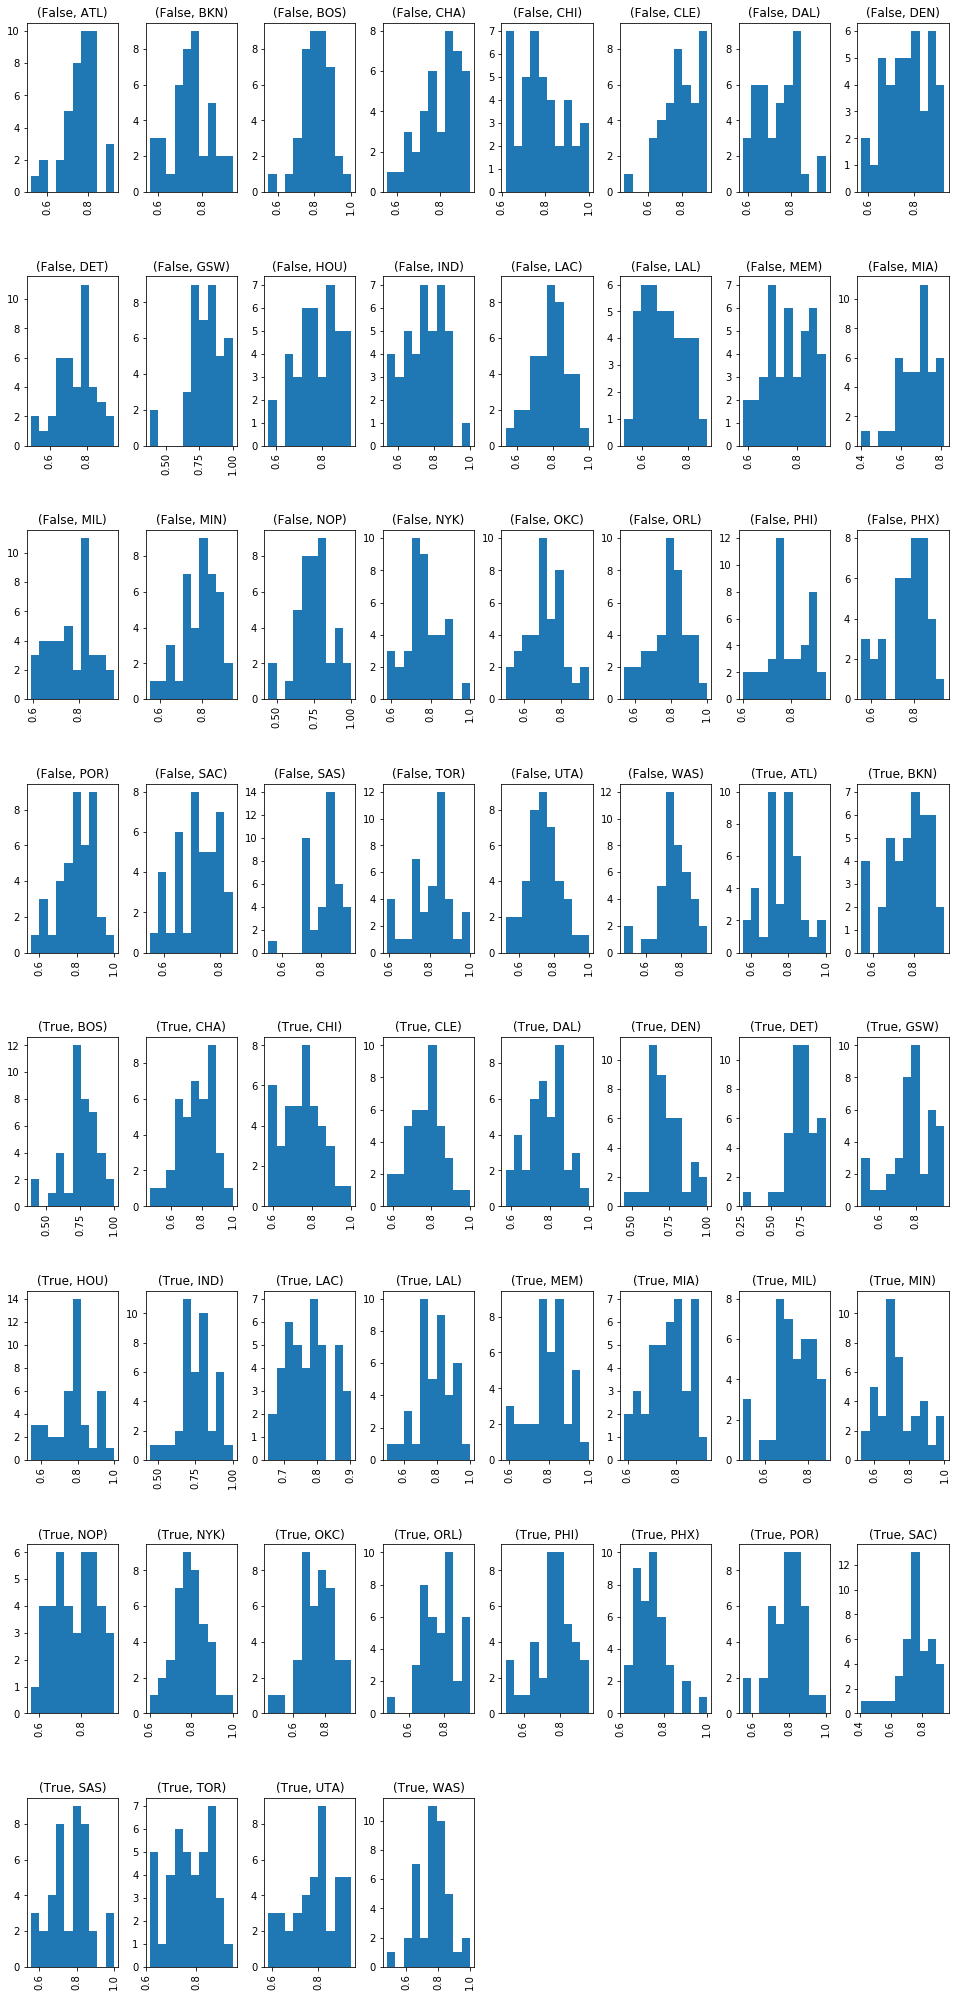

In [179]:
FTdf['FT_PCT'].hist(by=[FTdf['Home']==False,FTdf['Venue']], figsize = (16,36))

In [180]:
#FTdf['FT_PCT'].plot(by=[FTdf['TEAM_ABBREVIATION'],FTdf['Venue']], figsize = (16,36))

## Metrics
We want to see if there is an advantage when it comes to free throw shooting. One way would be to check the free throw percentage of a team at home and compare it to the free throw percentage at a different venue. Then we can see if a certain venue shows a big difference.

For each venue, show the difference in percentage, possibly with a heat map.

For each team, show the difference in percentage in each venue.

In [181]:
# compute ft pct home and away for each team, create scatterplot

# first we need columns for home and away ft and fta
#FTdf['FTAHome'], FTdf['FTMHome'], FTdf['FTAAway'], FTdf['FTMAway'] = np.NaN, np.NaN, np.NaN, np.NaN

# now put the correct ones in home and away
FTdf['FTAHome'] = [attempts  if home == True else np.NaN for (attempts,home) in zip(FTdf['FTA'],FTdf['Home'])]
FTdf['FTMHome'] = [made  if home == True else np.NaN for (made,home) in zip(FTdf['FTM'],FTdf['Home'])]
FTdf['FTAAway'] = [attempts  if home == False else np.NaN for (attempts,home) in zip(FTdf['FTA'],FTdf['Home'])]
FTdf['FTMAway'] = [made  if home == False else np.NaN for (made,home) in zip(FTdf['FTM'],FTdf['Home'])]




C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dave\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [182]:
# need to aggregate, get the percentages, and plot the results
ftGroup = FTdf.groupby('TEAM_ABBREVIATION').agg(
                                                HomeFTA = ('FTAHome', 'sum'),
                                                HomeFTM = ('FTMHome', 'sum'),
                                                AwayFTA = ('FTAAway', 'sum'),
                                                AwayFTM = ('FTMAway', 'sum')).reset_index()


ftGroup['HomePct'] = ftGroup['HomeFTM']/ftGroup['HomeFTA']*100
ftGroup['AwayPct'] = ftGroup['AwayFTM']/ftGroup['AwayFTA']*100

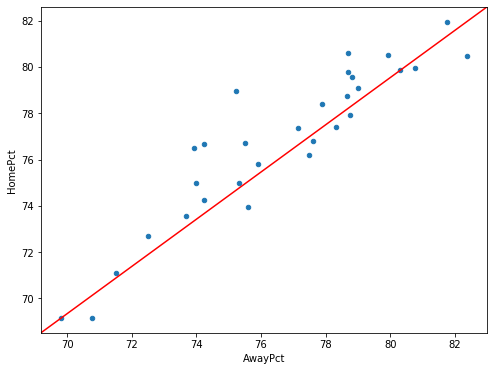

In [183]:
fig, ax = plt.subplots(figsize=(8,6))
ftGroup.plot(kind='scatter', x = "AwayPct", y = "HomePct", ax=ax)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

## What are we looking at?
The red line represents an equal free throw percentage at home and on the road. Points above the line shows a better percentage at home, while a point below the line shows a better percentage on the road.

Twenty-one of the thirty teams show a better free throw percentage at home, which does show that the home crowd could be influencing the road team's free throws.

In [184]:
# Create group by venue, add calc field for home pct - away pct
# Then create a heat map with venue on the vertical axis and team on the lower axis. The larger the diff, the 
# more of an effect the venue has

In [185]:
venueGroup = FTdf.groupby(['Venue', 'TEAM_ABBREVIATION']).agg(
                                                HomeFTA = ('FTAHome', 'sum'),
                                                HomeFTM = ('FTMHome', 'sum'),
                                                AwayFTA = ('FTAAway', 'sum'),
                                                AwayFTM = ('FTMAway', 'sum')).reset_index()


#venueGroup['Difference'] = (venueGroup['HomeFTM']/venueGroup['HomeFTA'] - venueGroup['AwayFTM']/venueGroup['AwayFTA'])*100

In [186]:

homePct = venueGroup[venueGroup['Venue'] == venueGroup['TEAM_ABBREVIATION']]
homePct = homePct[['TEAM_ABBREVIATION', 'HomeFTA', 'HomeFTM']]
homePct['HomePct'] = homePct['HomeFTM']/homePct['HomeFTA']

homePct = homePct[['TEAM_ABBREVIATION','HomePct']]
homePct.head()

teamDict = homePct.set_index('TEAM_ABBREVIATION')['HomePct'].to_dict()
teamDict['ATL']

# (df.set_index('name')['coverage'].to_dict())

0.7648261758691206

In [187]:
venueGroup.head()

,Venue,TEAM_ABBREVIATION,HomeFTA,HomeFTM,AwayFTA,AwayFTM
0,ATL,ATL,978.0,748.0,0.0,0.0
1,ATL,BKN,0.0,0.0,54.0,33.0
2,ATL,BOS,0.0,0.0,46.0,40.0
3,ATL,CHA,0.0,0.0,46.0,37.0
4,ATL,CHI,0.0,0.0,64.0,48.0


In [188]:
venueGroup['HomePct'] = [teamDict[row] for row in venueGroup['TEAM_ABBREVIATION']]
venueGroup['Difference'] = (venueGroup['HomePct']-(venueGroup['AwayFTM']/venueGroup['AwayFTA']))*100
venueGroup.drop(venueGroup[venueGroup['Venue'] == venueGroup['TEAM_ABBREVIATION']].index, inplace = True)
venueGroup.head()


#df.drop(df[df['Age'] < 25].index, inplace = True)
#df['previous_year'] = [row-1 for row in df['year']]

,Venue,TEAM_ABBREVIATION,HomeFTA,HomeFTM,AwayFTA,AwayFTM,HomePct,Difference
1,ATL,BKN,0.0,0.0,54.0,33.0,0.749758,13.864734
2,ATL,BOS,0.0,0.0,46.0,40.0,0.805310,-6.425548
3,ATL,CHA,0.0,0.0,46.0,37.0,0.805894,0.154648
4,ATL,CHI,0.0,0.0,64.0,48.0,0.779126,2.912621
5,ATL,CLE,0.0,0.0,29.0,23.0,0.797834,0.473049


In [189]:
venueGroup.count()

Venue                870
TEAM_ABBREVIATION    870
HomeFTA              870
HomeFTM              870
AwayFTA              870
AwayFTM              870
HomePct              870
Difference           870
dtype: int64

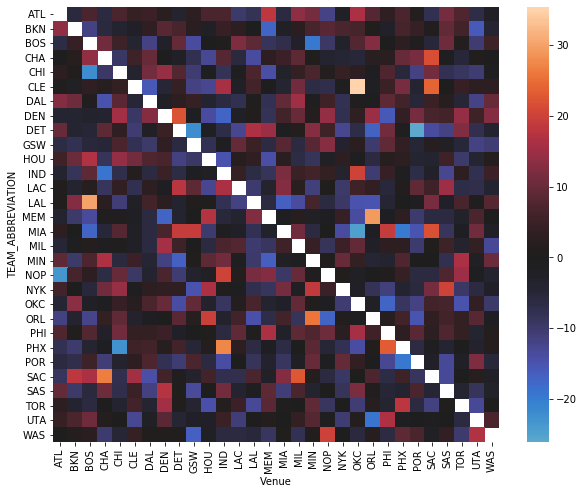

In [190]:
# --------------------------
# venueGroup currently has every team
#  at every venue, including their own
#  I need to get rid of those rows, but retain the home percentage
#  somehow.
    
#  possibility: create a function that calculates the home percentage
#  for each team, calculates the difference for that team in each
#  venue, then removes that row. 
    
#  After that, the heatmap should be ready to go

# venuePivot = venueGroup.pivot('Venue', 'Difference')
# ax = sns.heatmap(venuePivot)
fig, ax = plt.subplots(figsize=(10,8))   
heatMapPivot = venueGroup.pivot('TEAM_ABBREVIATION', 'Venue', 'Difference')
ax = sns.heatmap(heatMapPivot, center=0)

      # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)